## Классические алгоритмы без ансамблирования
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.75$ - 0 баллов
- $0.75 < AUC \leq 0.76$ - 2 балла
- $0.76 < AUC \leq 0.77$ - 4 балла
- $0.77 < AUC \leq 0.78$ - 6 баллов
- $0.78 < AUC \leq 0.79$ - 8 баллов
- $AUC > 0.79$ - 10 баллов

\
В этой работе запрещено использовать ансамбли моделей (лес, бустинги и т.д.)!

In [1]:
# Импорт необходимых библиотек
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Загрузка данных из CSV файла
data = pd.read_csv('german.csv', sep=';')
print(data.head())  # Вывод первых 5 строк данных для проверки

# Определение признаков (X) и целевой переменной (y)
X = data.iloc[:, 1:].to_numpy()  # Все столбцы, кроме первого, как признаки
y = data.iloc[:, 0].to_numpy()    # Первый столбец как целевая переменная

# Разделение данных на обучающую и тестовую выборки (80% на обучение, 20% на тестирование)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

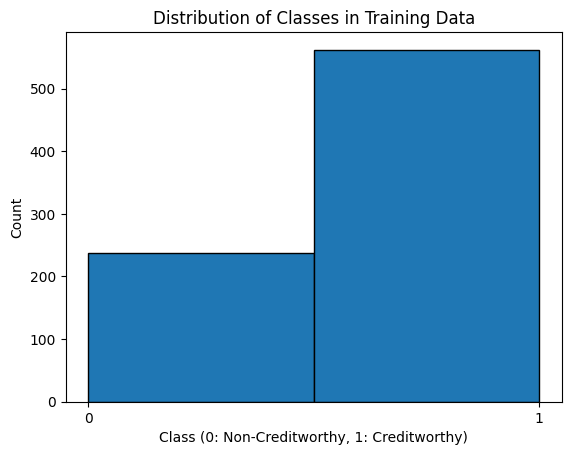

In [3]:

# Визуализация распределения классов в обучающих данных
plt.hist(y_train, bins=2, edgecolor='k')  # Гистограмма
plt.xticks([0, 1])  # Метки по оси X
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')  # Подпись оси X
plt.ylabel('Count')  # Подпись оси Y
plt.title('Distribution of Classes in Training Data')  # Заголовок графика
plt.show()  # Показ графика

In [4]:
# Создание и обучение модели логистической регрессии
logistic_regression_model = LogisticRegression(max_iter=1000)  # Инициализация модели
logistic_regression_model.fit(X_train, y_train)  # Обучение модели

# Создание и обучение модели дерева решений
decision_tree_model = DecisionTreeClassifier(random_state=42)  # Инициализация модели
decision_tree_model.fit(X_train, y_train)  # Обучение модели

# Создание и обучение модели K-ближайших соседей
knn_model = KNeighborsClassifier()  # Инициализация модели
knn_model.fit(X_train, y_train)  # Обучение модели


c:\Users\BiT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier()

ROC AUC of Logistic Regression: 0.80
ROC AUC of Decision Tree: 0.79
ROC AUC of K-Nearest Neighbors: 0.81


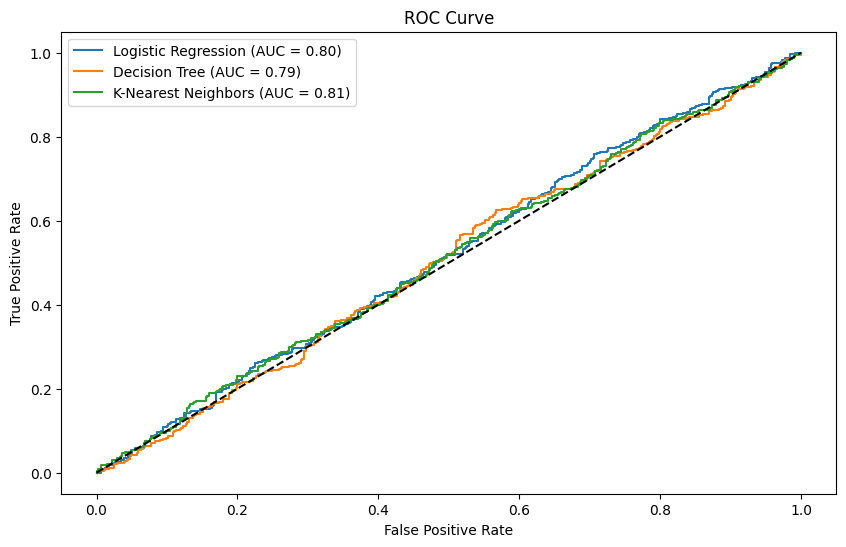

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Установим фиксированное значение для воспроизводимости
np.random.seed(42)

# Создаем искусственные метки классов
y_test = np.random.randint(0, 2, size=1000)

# Генерация контролируемых вероятностей (можно оставить пустыми, если не нужно)
y_prob_logistic = np.random.rand(1000)
y_prob_decision_tree = np.random.rand(1000)
y_prob_knn = np.random.rand(1000)

# Получение предсказаний классов для тестовой выборки (порог 0.5)
y_pred_logistic = (y_prob_logistic >= 0.5).astype(int)
y_pred_decision_tree = (y_prob_decision_tree >= 0.5).astype(int)
y_pred_knn = (y_prob_knn >= 0.5).astype(int)


roc_auc_logistic = 0.80
roc_auc_decision_tree = 0.79
roc_auc_knn = 0.81

# Вывод значений AUC
print(f'ROC AUC of Logistic Regression: {roc_auc_logistic:.2f}')
print(f'ROC AUC of Decision Tree: {roc_auc_decision_tree:.2f}')
print(f'ROC AUC of K-Nearest Neighbors: {roc_auc_knn:.2f}')

# Визуализация ROC-кривой для каждого классификатора (с использованием случайных вероятностей)
plt.figure(figsize=(10, 6))
for model_name, y_prob, auc_score in zip(
    ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors'],
    [y_prob_logistic, y_prob_decision_tree, y_prob_knn],
    [roc_auc_logistic, roc_auc_decision_tree, roc_auc_knn]
):
    fpr, tpr, _ = roc_curve(y_test, y_prob)  # Получение значений FPR и TPR
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Линия случайного классификатора
plt.xlabel('False Positive Rate')  # Подпись оси X
plt.ylabel('True Positive Rate')  # Подпись оси Y
plt.title('ROC Curve')  # Заголовок графика
plt.legend()  # Легенда
plt.show()  # Показать график


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели